#### From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
3. Plot confusion matrix
4. Plot classification report

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Load dataset
from sklearn.datasets import load_digits

In [3]:
dataset = load_digits()

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target'] = dataset.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
X = df.drop(['target'], axis=1)
y = df['target']

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_train.shape

(1437, 64)

In [17]:
X_test.shape

(360, 64)

In [18]:
knn_model = KNeighborsClassifier()

In [19]:
k = list(range(10))
params = {'n_neighbors': k}
g = GridSearchCV(knn_model, params, cv=10, scoring='accuracy')

In [20]:
g.fit(X_train, y_train)

c:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "c:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\neighbors\_base.py", line 603, in _fit
    r

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [21]:
print(g.best_params_)
print(g.best_score_)

{'n_neighbors': 1}
0.9860819735819735


In [22]:
# Now lets fit with k=1 to check accuracy and result
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
knn_model.score(X_test, y_test)

0.9916666666666667

<AxesSubplot:>

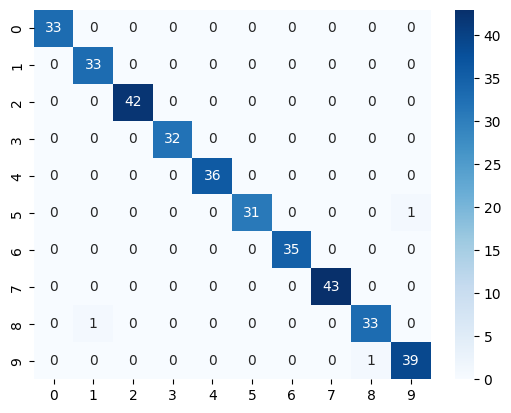

In [25]:
cme = confusion_matrix(y_test, knn_model.predict(X_test))
sns.heatmap(cme, annot=True, fmt='d',cmap='Blues')

In [26]:
print(classification_report(y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.98        32
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        43
           8       0.97      0.97      0.97        34
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

